In [299]:
import os
import urllib.request
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()   

In [300]:
def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [301]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [302]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [303]:
"""X = train_data.drop("Survived", axis =1).copy()
y = train_data["Survived"].copy()"""
#X_train, X_test, y_train, y_test = X[:700], X[700:], y[:700], y[:700]

X_train, X_test = train_data[:700], train_data[700:]

In [304]:
def name_count(X_train):
    X_train["First_name"] = X_train.Name.str.split(",").str[0]
    X_train["Second_name"] = X_train.Name.str.split(".").str[1]
    
    X_name_1 = X_train.Name.str.split(",").str[0].value_counts().reset_index(drop=False)
    X_name_2 = X_train.Name.str.split(".").str[1].value_counts().reset_index(drop=False)
    X_name_1.columns = ["First_name","first_name_count"]
    X_name_2.columns = ["Second_name","second_name_count"]
    X_train_name = X_train.join(X_name_1.set_index("First_name")['first_name_count'], on='First_name')
    X_train_name = X_train_name.join(X_name_2.set_index("Second_name")['second_name_count'], on='Second_name')
    X_train_name = X_train_name.drop(["Name", "First_name", "Second_name", "Ticket", "Cabin"], axis=1).copy()
    return X_train_name

In [305]:
df = name_count(X_train)

C:\Users\hogeon\AppData\Local\Temp\ipykernel_10080\1672639937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["First_name"] = X_train.Name.str.split(",").str[0]
C:\Users\hogeon\AppData\Local\Temp\ipykernel_10080\1672639937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Second_name"] = X_train.Name.str.split(".").str[1]


In [306]:
df["Sex_id"] = df["Sex"].map(lambda x : int(1) if "male" else int(0))

In [307]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Sex_id"]):
    X_train_set = df.loc[train_index]
    X_test_set = df.loc[test_index]

In [308]:
X_train_set["Sex_id"].value_counts() / len(X_train_set)

1    1.0
Name: Sex_id, dtype: float64

In [309]:
X_test_set["Sex_id"].value_counts() / len(X_test_set)

1    1.0
Name: Sex_id, dtype: float64

In [310]:
for set_ in (X_train_set, X_test_set):
    set_.drop("Sex", axis=1, inplace=True)

In [311]:
X_test_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,first_name_count,second_name_count,Sex_id
95,96,0,3,NaN,0,0,8.0500,S,1,1,1
343,344,0,2,25.0,0,0,13.0000,S,1,1,1
590,591,0,3,35.0,0,0,7.1250,S,1,1,1
121,122,0,3,NaN,0,0,8.0500,S,1,1,1
561,562,0,3,40.0,0,0,7.8958,S,1,1,1


In [312]:
X_train_set = X_train_set.set_index("PassengerId")
X_test_set = X_test_set.set_index("PassengerId")

In [313]:
X_train_set["Embarked"].value_counts()

S    398
C    113
Q     48
Name: Embarked, dtype: int64

In [314]:
corr_matrix = X_train_set.corr()

C:\Users\hogeon\AppData\Local\Temp\ipykernel_10080\2831140035.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X_train_set.corr()


In [315]:

corr_matrix["Survived"].sort_values(ascending=False)

Survived             1.000000
Fare                 0.236029
Parch                0.069678
SibSp               -0.037265
first_name_count    -0.053873
Age                 -0.095773
second_name_count   -0.103459
Pclass              -0.330438
Sex_id                    NaN
Name: Survived, dtype: float64

C:\Users\hogeon\HOME\ml\env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\hogeon\HOME\ml\env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\hogeon\HOME\ml\env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot: xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot: xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot: xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot: xlabel='Age', ylabel='Survived'>,
        <AxesSubplot: xlabel='Sex_id', ylabel='Survived'>],
       [<AxesSubplot: xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot: xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot: xlabel='Pclass', ylabel='Fare'>,
        <AxesSubplot: xlabel='Age', ylabel='Fare'>,
        <AxesSubplot: xlabel='Sex_id', ylabel='Fare'>],
       [<AxesSubplot: xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot: xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot: xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot: xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot: xlabel='Sex_id', ylabel='Pclass'>],
       [<AxesSubplot: xlabel='Survived', ylabel='Age'>,
        <AxesSubplot: xlabel='Fare', ylabel='Age'>,
        <AxesSubplot: xlabel='Pclass', ylab

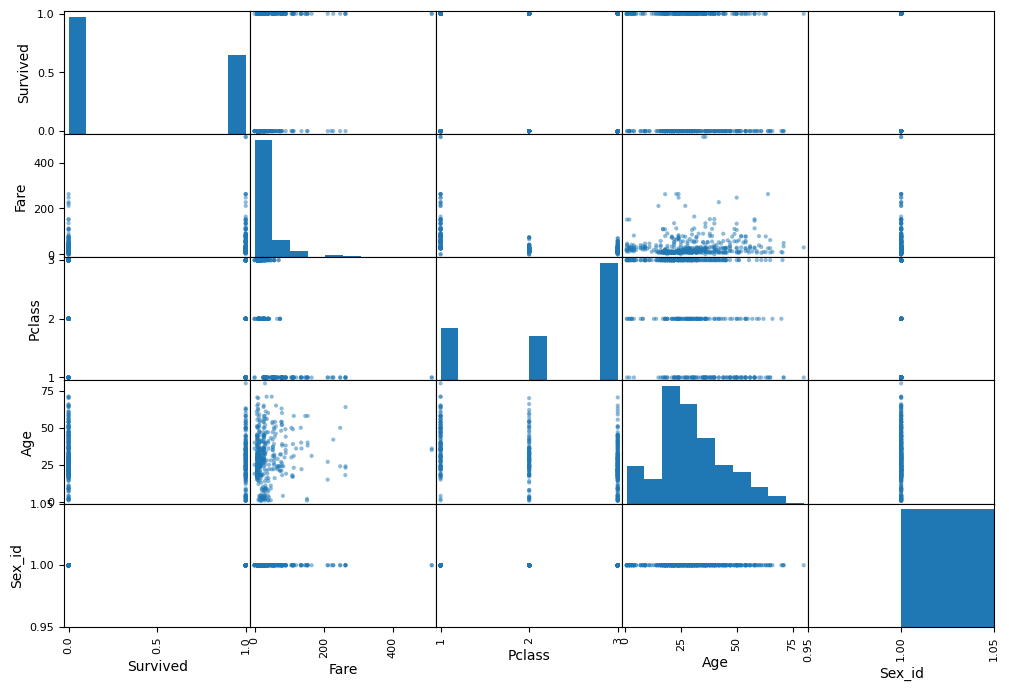

In [316]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Fare", "Pclass","Age", "Sex_id"]
scatter_matrix(X_train_set[attributes], figsize=(12,8))

In [317]:
titanic = X_train_set.drop("Survived", axis =1)
titanic_label = X_train_set["Survived"].copy()

In [318]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_train_num = titanic.drop("Embarked", axis=1)
imputer.fit(X_train_num)
print(imputer.statistics_)
X=imputer.transform(X_train_num)
X_train_num_tr = pd.DataFrame(X, columns=X_train_num.columns, index=X_train_num.index)
X_train_num_tr

[ 3.  28.   0.   0.  15.5  1.   1.   1. ]


,Pclass,Age,SibSp,Parch,Fare,first_name_count,second_name_count,Sex_id
PassengerId,,,,,,,,
470,3.0,0.75,2.0,1.0,19.2583,3.0,1.0,1.0
418,2.0,18.00,0.0,2.0,13.0000,1.0,1.0,1.0
283,3.0,16.00,0.0,0.0,9.5000,1.0,1.0,1.0
102,3.0,28.00,0.0,0.0,7.8958,1.0,1.0,1.0
657,3.0,28.00,0.0,0.0,7.8958,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...
667,2.0,25.00,0.0,0.0,13.0000,1.0,1.0,1.0
46,3.0,28.00,0.0,0.0,8.0500,1.0,3.0,1.0
319,1.0,31.00,0.0,2.0,164.8667,1.0,1.0,1.0


In [319]:
from sklearn.preprocessing import OneHotEncoder

X_train_cat = titanic[["Embarked"]]

cat_encoder = OneHotEncoder()
X_train_cat_1hot = cat_encoder.fit_transform(X_train_cat)
X_train_cat_1hot.toarray()

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [320]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

X_train_tr = num_pipeline.fit_transform(X_train_num)

In [321]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_attribs = list(X_train_num)
cat_attribs = ["Embarked"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

titanic_prepared = full_pipeline.fit_transform(titanic)
titanic_prepared

array([[ 0.83452759, -2.11737622,  1.41204155, ...,  0.        ,
         0.        ,  0.        ],
       [-0.36070374, -0.84293322, -0.52843273, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.83452759, -0.99069473, -0.52843273, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.55593507,  0.11751657, -0.52843273, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.83452759, -0.17800644, -0.52843273, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.83452759, -0.10412569, -0.52843273, ...,  1.        ,
         0.        ,  0.        ]])

In [347]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(titanic_prepared, titanic_label)

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, titanic_prepared, titanic_label, cv=10)
forest_scores.mean()

0.6946428571428571

In [323]:
some_data = titanic.iloc[:5]
some_labels = titanic_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("예측:", lin_reg.predict(some_data_prepared))
print("레이블:", list(some_labels))

예측: [0.47526345 0.68387495 0.35774965 0.25525749 0.2043501 ]
레이블: [1, 1, 0, 0, 0]


In [324]:
from sklearn.linear_model import RandomForestClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(titanic_prepared, titanic_label)

SGDClassifier(random_state=42)

In [334]:
titanic_labels = titanic_label.reset_index(drop=True).copy()
titanic_labels = (titanic_labels == 1)
titanic_labels

0       True
1       True
2      False
3      False
4      False
       ...  
555    False
556    False
557     True
558    False
559    False
Name: Survived, Length: 560, dtype: bool

In [339]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(titanic_prepared, titanic_labels):
    clone_clf = clone(sgd_clf)
    X_train_folds = titanic_prepared[train_index]
    y_train_folds = titanic_labels[train_index]
    X_test_fold = titanic_prepared[test_index]
    y_test_fold = titanic_labels[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(accuracy_score(y_test_fold,y_pred))
    print(n_correct / len(y_pred))

0.6470588235294118
0.6470588235294118
0.5454545454545454
0.5454545454545454
0.5860215053763441
0.5860215053763441


In [341]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, titanic_prepared, titanic_labels, cv=3, method="predict_proba")

In [346]:
y_probas_forest.mean()

0.5

In [344]:
y_probas_forest.shape

(560, 2)